<h1>Wildfire Smoke Detection using Machine Learning</h1>

**Problem Statement** : Wildfires pose a serious threat to ecosystems, human lives, and infrastructure, and traditional monitoring methods are often slow and inefficient. This project leverages satellite imagery and machine learning to automatically detect wildfire smoke in real time, enabling faster response and risk management.

**Description** : This project focuses on detecting wildfire smoke using satellite images from the Hyderabad region. A labeled dataset with image paths, locations, and wildfire indicators is used for training. Logistic Regression, a simple yet effective machine learning algorithm, is applied to classify whether smoke indicating wildfire is present or not. The goal is to demonstrate how even a lightweight model can support early wildfire detection, enabling timely alerts for disaster management and climate risk reduction.

In [4]:
# Libraries required
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image

In [5]:
#correct dataset path
data_path = "/kaggle/input/wildfire-dataset"

#csv path
csv_path = os.path.join(data_path, "/kaggle/input/wlidfire-dataset/wildfire_data.csv")

#load csv
df = pd.read_csv(csv_path)
print(df.head())


      image_id          image_path     label                  location
0  img_001.jpg  images/img_001.jpg  no_smoke      Charminar, Hyderabad
1  img_002.jpg  images/img_002.jpg     smoke    Hitech City, Hyderabad
2  img_003.jpg  images/img_003.jpg  no_smoke      Tank Bund, Hyderabad
3  img_004.jpg  images/img_004.jpg     smoke  Banjara Hills, Hyderabad
4  img_005.jpg  images/img_005.jpg  no_smoke  Golconda Fort, Hyderabad


In [6]:
 #basic info 
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    50 non-null     object
 1   image_path  50 non-null     object
 2   label       50 non-null     object
 3   location    50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB
None
           image_id          image_path     label              location
count            50                  50        50                    50
unique           50                  50         2                    30
top     img_001.jpg  images/img_001.jpg  no_smoke  Charminar, Hyderabad
freq              1                   1        25                     2
image_id      0
image_path    0
label         0
location      0
dtype: int64


In [7]:
#rows and cols
print("Shape of dataset:", df.shape)

Shape of dataset: (50, 4)


In [8]:
#colums
df.columns

Index(['image_id', 'image_path', 'label', 'location'], dtype='object')

⚠️ Skipping plot for 'image_id' (50 unique values)
image_id
img_001.jpg    1
img_038.jpg    1
img_028.jpg    1
img_029.jpg    1
img_030.jpg    1
img_031.jpg    1
img_032.jpg    1
img_033.jpg    1
img_034.jpg    1
img_035.jpg    1
Name: count, dtype: int64
----

⚠️ Skipping plot for 'image_path' (50 unique values)
image_path
images/img_001.jpg    1
images/img_038.jpg    1
images/img_028.jpg    1
images/img_029.jpg    1
images/img_030.jpg    1
images/img_031.jpg    1
images/img_032.jpg    1
images/img_033.jpg    1
images/img_034.jpg    1
images/img_035.jpg    1
Name: count, dtype: int64
----



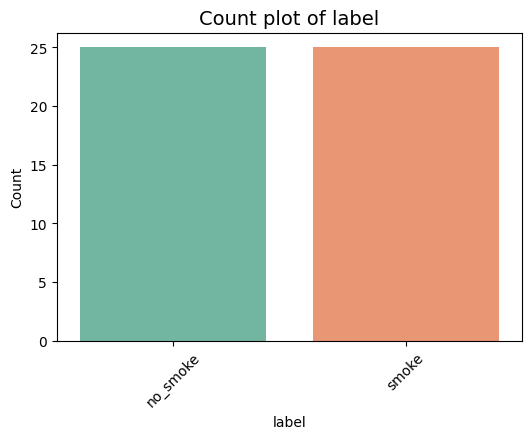

⚠️ Skipping plot for 'location' (30 unique values)
location
Charminar, Hyderabad          2
Shamshabad, Hyderabad         2
Jubilee Hills, Hyderabad      2
Khairatabad, Hyderabad        2
RTC Cross Roads, Hyderabad    2
Malakpet, Hyderabad           2
Hitech City, Hyderabad        2
Mehdipatnam, Hyderabad        2
LB Nagar, Hyderabad           2
Miyapur, Hyderabad            2
Name: count, dtype: int64
----



In [9]:
# -----------------------------
#  UNIVARIATE ANALYSIS
# -----------------------------

max_unique = 20  # only plot if column has <= 20 unique values

for col in df.columns:
    unique_vals = df[col].nunique()
    
    if df[col].dtype == "object" or df[col].dtype.name == "category":
        if unique_vals <= max_unique:
            plt.figure(figsize=(6,4))
            sns.countplot(x=col, data=df, palette="Set2")
            plt.title(f"Count plot of {col}", fontsize=14)
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"⚠️ Skipping plot for '{col}' ({unique_vals} unique values)")
            print(df[col].value_counts().head(10))  # show top 10 instead
            print("----\n")
    else:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


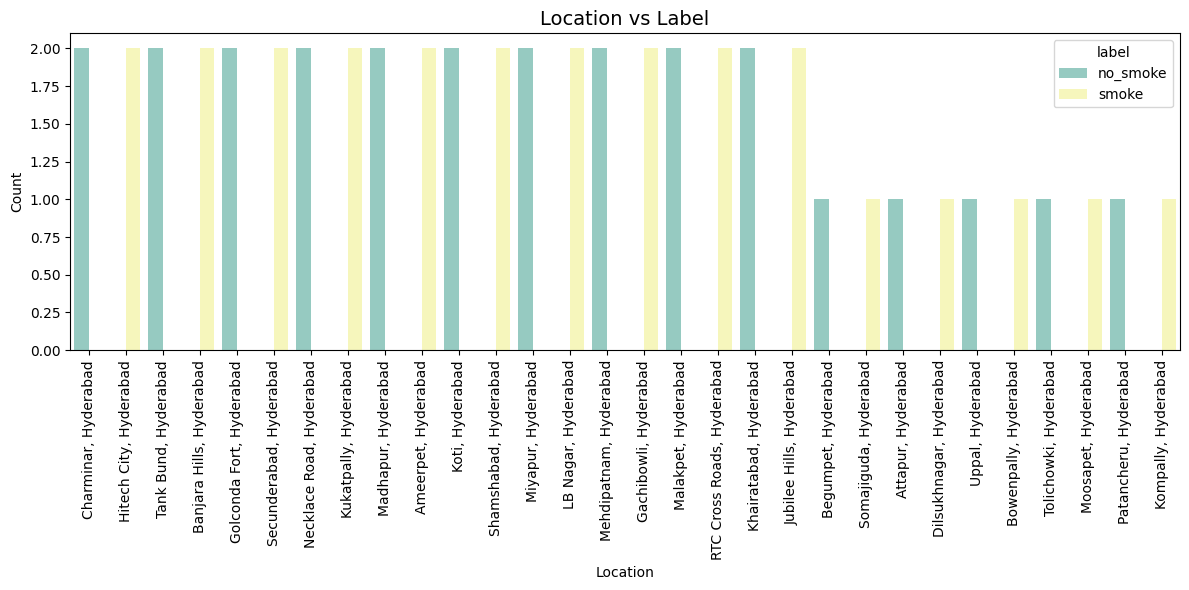

In [10]:
# Bivariate analysis
plt.figure(figsize=(12,6))
sns.countplot(x="location", hue="label", data=df, palette="Set3")
plt.title("Location vs Label", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)  # rotate to prevent overlap
plt.tight_layout()
plt.show()

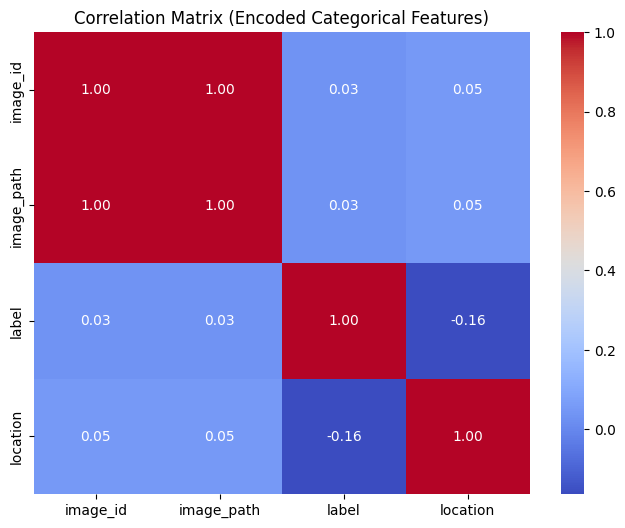

In [11]:
#correlation matrix
#Encode categories → Correlation matrix (since no numerical values)
# Copy dataset
df_encoded = df.copy()

# Encode all categorical columns into numbers
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Encoded Categorical Features)")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

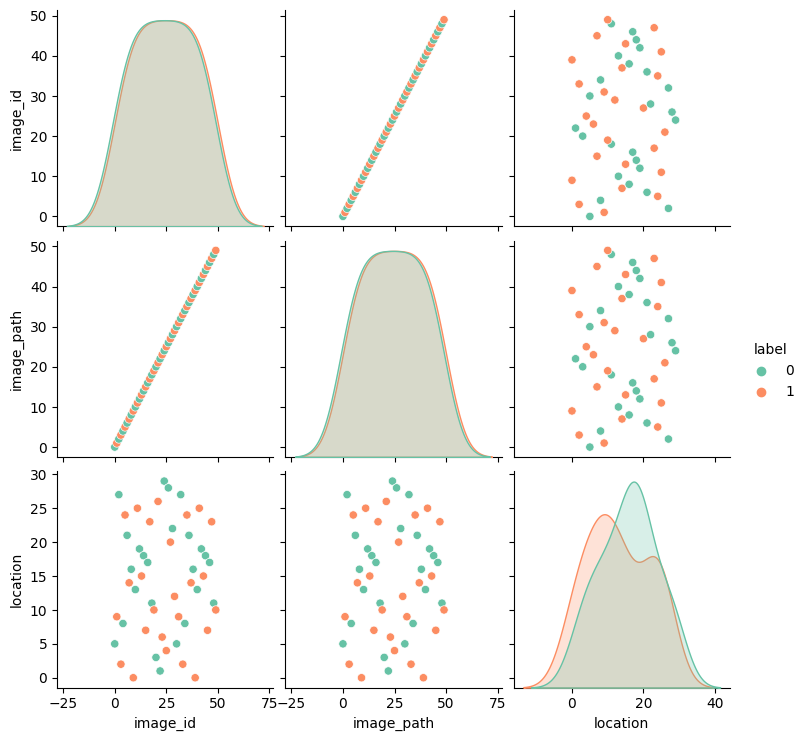

In [12]:
#PAIRPLOT

# Encode categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Pairplot
sns.pairplot(df_encoded, hue="label", diag_kind="kde", palette="Set2")
plt.show()


In [13]:
#Data preprocessing

# Drop rows with all NaN values (if any)
df = df.dropna(how="all")

# Fill categorical NaNs with mode (most frequent value)
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df = df.drop_duplicates()

In [15]:


encoder = LabelEncoder()
df["location"] = encoder.fit_transform(df["location"])
df["label"] = encoder.fit_transform(df["label"])   # smoke / no-smoke


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
X_train.shape

(40, 3)

In [18]:
X_test.shape

(10, 3)

In [19]:
X_train

,image_id,image_path,location
0,img_001.jpg,images/img_001.jpg,5
16,img_017.jpg,images/img_017.jpg,17
29,img_030.jpg,images/img_030.jpg,12
9,img_010.jpg,images/img_010.jpg,0
30,img_031.jpg,images/img_031.jpg,5
36,img_037.jpg,images/img_037.jpg,21
4,img_005.jpg,images/img_005.jpg,8
27,img_028.jpg,images/img_028.jpg,20
22,img_023.jpg,images/img_023.jpg,1
40,img_041.jpg,images/img_041.jpg,13
